# 기존 코드 : 데이터셋 불러오고 전체 그래프 추출

43 0
44 0
45 0
55 1
56 1
67 2
68 2
77 3
78 3
87 4
88 4
100 5
101 5
111 6
112 6
121 7
122 7
131 8
132 8
143 9
144 9
157 10
158 10
166 11
167 11
178 12
179 12
180 12
190 13
191 13
199 14
200 14


C:\Users\hhz20\AppData\Local\Temp/ipykernel_15000/2443301108.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['click'][i] += 1
C:\Users\hhz20\AppData\Local\Temp/ipykernel_15000/2443301108.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['click'][j+1] -= 1
C:\Users\hhz20\AppData\Local\Temp/ipykernel_15000/2443301108.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['click'][j+2] -= 1


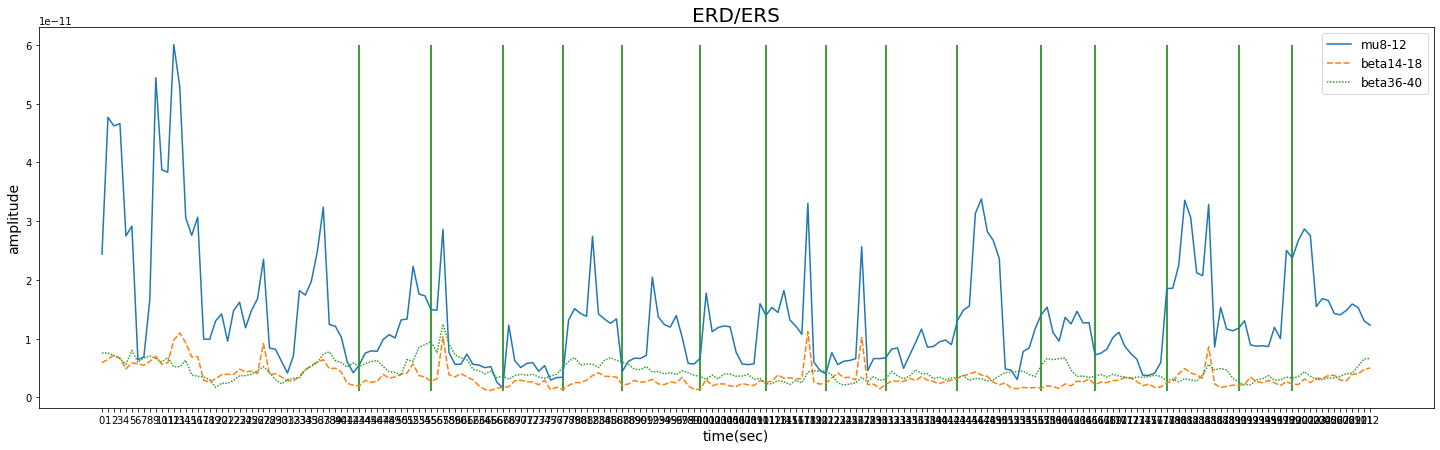

In [2]:
## 주석 부분은 범위 바꿔주고 싶을 때 바꾸면 되는 부분.

# Fp1_FFT 파일 불러오기
import pandas as pd
from datetime import datetime
 
df = pd.read_table('C:/Users/hhz20/신경공학 데이터/뇌파/MAVE_RawData/FP1/혜진/2022-06-04_오후 5_42/Fp1_FFT.txt',sep='\t',encoding = 'cp949')

df['mu8-12'] = 0
df['beta14-18'] = 0
df['beta36-40'] = 0
for i in range(1,len(df.columns)-3): # 마지막 컬럼 세개가 mu, beta,beta 여서 그거 제외한거
    if float(df.columns[i][:-2])>=8 and float(df.columns[i][:-2])<12 :
        df['mu8-12'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=14 and float(df.columns[i][:-2])<18:
        df['beta14-18'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=36 and float(df.columns[i][:-2])<40:
        df['beta36-40'] += df[df.columns[i]]
        
# ClickTime 파일 불러와서 배열에 저장.
# click time 시간포맷 변경해서 리스트에 넣기 오후 ㅁ:ㅁㅁ:ㅁㅁ
f = open("C:/Users/hhz20/신경공학 데이터/뇌파/MAVE_RawData/clicktime/혜진/2022-6-4 17.42.txt", "r")
click_time = []
while True:
    line = f.readline().strip()
    if not line: break
    click_time.append(line)

click_time_reformat = []
for i in range(len(click_time)):
    times = datetime.strptime(click_time[i][:-7],"%Y-%m-%d %H:%M:%S")
    if int(times.strftime("%H"))>12 :
        h = int(times.strftime("%H"))-12
        time_new =times.strftime("오후 "+ str(h)+":%M:%S")
        click_time_reformat.append(time_new)
    else:
        time_new =times.strftime("오전 %H:%M:%S")
        click_time_reformat.append(time_new)
        

# click에 시간차 0초 1초 인걸로 클릭 타이밍 1로 만들어주기.
df['click'] = 0
df['Time']
for i in range(0,len(df)) : # 뇌파기기에서 찍힌 시간
    df['Time'][i].split('.')
    time_1 = datetime.strptime(df['Time'][i].split('.')[0][3:],"%H:%M:%S") # 10이랑 11 조정해줘야함.
    for j in range(0, len(click_time)): # 클릭버튼 눌러서 찍힌 시간
        time_2 = datetime.strptime(click_time_reformat[j][3:],"%H:%M:%S")
        time_interval = time_2 - time_1
        if str(time_interval) == '0:00:00' or str(time_interval) == '0:00:01':
            print(i,j)
            df['click'][i] += 1
            break
            
# 중복된 click time 제거해주기 (3개까지 동시에 나오는 경우가 있어서 그거 제거 해줌)
for j in range(0,len(df)) : 
    if df['click'][j] == 1:
        if df['click'][j+1] == 1:
            df['click'][j+1] -= 1
            if df['click'][j+2] == 1:
                df['click'][j+2] -= 1
            
            
# 그래프 그리기     
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,7))

# Line graph by seaborn
ax = sns.lineplot(data=df[df.columns[-4:-1]])
# ax = sns.lineplot(data=df[df.columns[-4:-1]][50:])
plt.title('ERD/ERS', fontsize=20)
plt.ylabel('amplitude', fontsize=14)

plt.xlabel('time(sec)', fontsize=14)
plt.xticks([i for i in range(0,len(df), 1)])
# plt.xticks([i for i in range(50, len(df), 1)])
plt.legend(fontsize=12, loc='best')

# 세로 녹색 선 : 클릭 시점 표시해주기. 
for i in range(len(df)) :
# for i in range(50,len(df)) :
    if df['click'][i] ==1 :
        min_ = [min(df['mu8-12']),min(df['beta14-18']),min(df['beta36-40'])]
        max_ = [max(df['mu8-12']),max(df['beta14-18']),max(df['beta36-40'])]
#         min_ = [min(df['mu8-12'][30:]),min(df['beta14-18'][50:]),min(df['beta36-40'][50:])]
#         max_ = [max(df['mu8-12'][50:]),max(df['beta14-18'][50:]),max(df['beta36-40'][50:])]
        plt.vlines(i,min(min_),max(max_), color="green")
plt.show()     

# 앞뒤 5초간격으로 자른 그래프

# 앞뒤간격 5초 


# 5초

In [3]:
# # click 시점의 행넘버 리스트에 넣어주기
click_row_num = [] # click 시점의 행넘버

for k in range(len(df)) : 
    if df['click'][k] == 1: # click 시점의 행넘버 구하기
        click_row_num.append(k)

# 데이터프레임 이름 df_click_trial1~15까지 해서 각 trial마다 10초동안의 데이터프레임 잘라서 넣어주기. 
for i in range(0,15):
    globals()['df_click_trial{}'.format(i+1)] = df[df.columns[-4:]][click_row_num[i]-5:click_row_num[i]+6]
    
# 데이터프레임 1-15까지 합쳐서 평균 낸 데이터프레임 만들어주기.
df_average=df_click_trial1
df_average.reset_index(drop=True,inplace = True)

for i in range(1,15):
    df_average+=globals()['df_click_trial{}'.format(i+1)].reset_index(drop=True)
    
df_average=df_average/15

# 한 session 당 평균낸 결과 df_average 파일로 저장해두기.
df_average.to_excel("C:/Users/hhz20/신경공학 데이터/뇌파/average file/혜진_2022-06-04_오후 5_42.xlsx")

In [4]:
df_average

,mu8-12,beta14-18,beta36-40,click
0,1.185411e-11,3.274393e-12,4.412387e-12,0.0
1,1.004824e-11,3.266460e-12,4.207753e-12,0.0
2,1.150471e-11,3.331153e-12,4.263187e-12,0.0
3,8.342800e-12,2.223027e-12,4.380353e-12,0.0
4,9.950300e-12,2.293633e-12,4.216480e-12,0.0
5,9.975733e-12,2.136293e-12,4.271393e-12,1.0
6,1.326059e-11,2.617680e-12,4.320660e-12,0.0
7,1.326828e-11,3.510827e-12,4.565500e-12,0.0
8,1.356909e-11,2.996600e-12,4.270593e-12,0.0
9,1.295033e-11,3.118073e-12,4.122867e-12,0.0


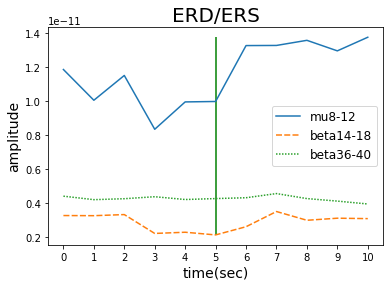

In [5]:
# average 낸거 그래프 그리기
ax = sns.lineplot(data=df_average[df_average.columns[0:3]])
# ax = sns.lineplot(data=df[df.columns[-4:-1]][50:])

plt.title('ERD/ERS', fontsize=20)
plt.ylabel('amplitude', fontsize=14)

plt.xlabel('time(sec)', fontsize=14)
plt.xticks([i for i in range(0, len(df_average), 1)])
# plt.xticks([i for i in range(50, len(df), 1)])
plt.legend(fontsize=12, loc='best')

# 세로 녹색 선 : 클릭 시점 표시해주기. 
for i in range(0, len(df_average), 1) :
# for i in range(50,len(df)) :
    if df_average['click'][i] == 1 :
        min_ = [min(df_average['mu8-12']),min(df_average['beta14-18']),min(df_average['beta36-40'])]
        max_ = [max(df_average['mu8-12']),max(df_average['beta14-18']),max(df_average['beta36-40'])]
#         min_ = [min(df['mu8-12'][30:]),min(df['beta14-18'][50:]),min(df['beta36-40'][50:])]
#         max_ = [max(df['mu8-12'][50:]),max(df['beta14-18'][50:]),max(df['beta36-40'][50:])]
        plt.vlines(i,min(min_),max(max_), color="green")
    

plt.show()     

In [6]:
# 만들어둔 모든 sesscion에 대한 평균 
df_average_all_session= pd.read_excel("C:/Users/hhz20/신경공학 데이터/뇌파/average file/혜진_2022-06-04_오후 2_28.xlsx")
df_average_all_session += pd.read_excel("C:/Users/hhz20/신경공학 데이터/뇌파/average file/혜진_2022-06-04_오후 2_34.xlsx")
df_average_all_session += pd.read_excel("C:/Users/hhz20/신경공학 데이터/뇌파/average file/혜진_2022-06-04_오후 5_37.xlsx")
df_average_all_session += pd.read_excel("C:/Users/hhz20/신경공학 데이터/뇌파/average file/혜진_2022-06-04_오후 5_42.xlsx")
df_average_all_session += pd.read_excel("C:/Users/hhz20/신경공학 데이터/뇌파/average file/혜진_2022-06-04_오후 5_46.xlsx")
df_average_all_session += pd.read_excel("C:/Users/hhz20/신경공학 데이터/뇌파/average file/혜진_2022-06-04_오후 5_51.xlsx")

df_average_all_session = df_average_all_session/6
df_average_all_session = df_average_all_session.drop(columns=['Unnamed: 0'])

In [7]:
df_average_all_session

,mu8-12,beta14-18,beta36-40,click
0,1.862916e-11,1.238130e-11,2.853235e-11,0.0
1,1.881484e-11,1.202086e-11,2.831917e-11,0.0
2,1.956162e-11,1.209112e-11,2.691021e-11,0.0
3,1.811644e-11,1.097815e-11,2.816725e-11,0.0
4,1.749933e-11,1.072195e-11,2.847863e-11,0.0
5,1.558578e-11,1.080538e-11,2.742732e-11,1.0
6,1.727422e-11,1.155337e-11,2.864623e-11,0.0
7,1.839399e-11,1.240240e-11,2.930072e-11,0.0
8,1.839208e-11,1.198157e-11,2.862554e-11,0.0
9,1.933505e-11,1.276707e-11,2.859606e-11,0.0


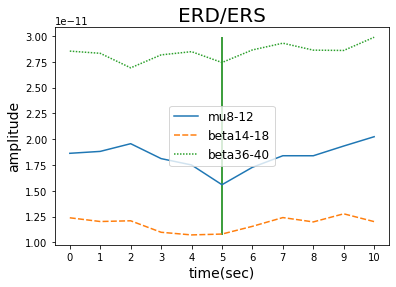

In [8]:
# average 낸거 그래프 그리기
ax = sns.lineplot(data=df_average_all_session[df_average_all_session.columns[0:3]])
# ax = sns.lineplot(data=df[df.columns[-4:-1]][50:])

plt.title('ERD/ERS', fontsize=20)
plt.ylabel('amplitude', fontsize=14)

plt.xlabel('time(sec)', fontsize=14)
plt.xticks([i for i in range(0, len(df_average_all_session), 1)])
# plt.xticks([i for i in range(50, len(df), 1)])
plt.legend(fontsize=12, loc='best')

# 세로 녹색 선 : 클릭 시점 표시해주기. 
for i in range(0, len(df_average), 1) :
# for i in range(50,len(df)) :
    if df_average_all_session['click'][i] == 1 :
        min_ = [min(df_average_all_session['mu8-12']),min(df_average_all_session['beta14-18']),min(df_average_all_session['beta36-40'])]
        max_ = [max(df_average_all_session['mu8-12']),max(df_average_all_session['beta14-18']),max(df_average_all_session['beta36-40'])]
#         min_ = [min(df['mu8-12'][30:]),min(df['beta14-18'][50:]),min(df['beta36-40'][50:])]
#         max_ = [max(df['mu8-12'][50:]),max(df['beta14-18'][50:]),max(df['beta36-40'][50:])]
        plt.vlines(i,min(min_),max(max_), color="green")
    

plt.show()     

61 0
62 0
73 1
74 1
86 2
87 2
97 3
98 3
108 4
109 4
121 5
122 5
131 6
132 6
141 7
142 7
154 8
155 8
163 9
164 9
174 10
175 10
185 11
186 11
197 12
198 12
210 13
211 13
221 14
222 14


C:\Users\hhz20\AppData\Local\Temp/ipykernel_1868/2838936742.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['click'][i] += 1
C:\Users\hhz20\AppData\Local\Temp/ipykernel_1868/2838936742.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['click'][j+1] -= 1


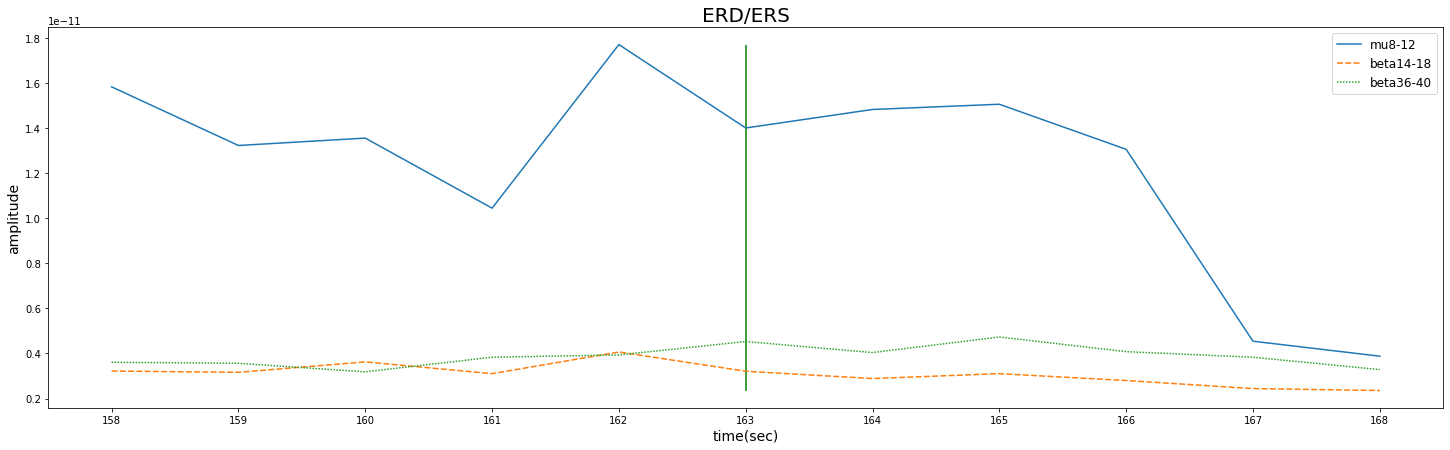

In [13]:
## 주석 부분은 범위 바꿔주고 싶을 때 바꾸면 되는 부분.

# Fp1_FFT 파일 불러오기
import pandas as pd
from datetime import datetime
 
df = pd.read_table('C:/Users/hhz20/신경공학 데이터/뇌파/MAVE_RawData/FP1/혜진/2022-06-04_오후 5_46/Fp1_FFT.txt',sep='\t',encoding = 'cp949')

df['mu8-12'] = 0
df['beta14-18'] = 0
df['beta36-40'] = 0
for i in range(1,len(df.columns)-3): # 마지막 컬럼 세개가 mu, beta,beta 여서 그거 제외한거
    if float(df.columns[i][:-2])>=8 and float(df.columns[i][:-2])<12 :
        df['mu8-12'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=14 and float(df.columns[i][:-2])<18:
        df['beta14-18'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=36 and float(df.columns[i][:-2])<40:
        df['beta36-40'] += df[df.columns[i]]
        
# ClickTime 파일 불러와서 배열에 저장.
# click time 시간포맷 변경해서 리스트에 넣기 오후 ㅁ:ㅁㅁ:ㅁㅁ
f = open("C:/Users/hhz20/신경공학 데이터/뇌파/MAVE_RawData/clicktime/혜진/2022-6-4 17.47.txt", "r")
click_time = []
while True:
    line = f.readline().strip()
    if not line: break
    click_time.append(line)

click_time_reformat = []
for i in range(len(click_time)):
    times = datetime.strptime(click_time[i][:-7],"%Y-%m-%d %H:%M:%S")
    if int(times.strftime("%H"))>12 :
        h = int(times.strftime("%H"))-12
        time_new =times.strftime("오후 "+ str(h)+":%M:%S")
        click_time_reformat.append(time_new)
    else:
        time_new =times.strftime("오전 %H:%M:%S")
        click_time_reformat.append(time_new)
        

# click에 시간차 0초 1초 인걸로 클릭 타이밍 1로 만들어주기.
df['click'] = 0
df['Time']
for i in range(0,len(df)) : # 뇌파기기에서 찍힌 시간
    df['Time'][i].split('.')
    time_1 = datetime.strptime(df['Time'][i].split('.')[0][3:],"%H:%M:%S") # 10이랑 11 조정해줘야함.
    for j in range(0, len(click_time)): # 클릭버튼 눌러서 찍힌 시간
        time_2 = datetime.strptime(click_time_reformat[j][3:],"%H:%M:%S")
        time_interval = time_2 - time_1
        if str(time_interval) == '0:00:00' or str(time_interval) == '0:00:01':
            print(i,j)
            df['click'][i] += 1
            break
            
# 중복된 click time 제거해주기 (3개까지 동시에 나오는 경우가 있어서 그거 제거 해줌)
for j in range(0,len(df)) : 
    if df['click'][j] == 1:
        if df['click'][j+1] == 1:
            df['click'][j+1] -= 1
            if df['click'][j+2] == 1:
                df['click'][j+2] -= 1
            
            
# 그래프 그리기     
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,7))

# Line graph by seaborn
ax = sns.lineplot(data=df[df.columns[-4:-1]][158:169])
# ax = sns.lineplot(data=df[df.columns[-4:-1]][50:])
plt.title('ERD/ERS', fontsize=20)
plt.ylabel('amplitude', fontsize=14)

plt.xlabel('time(sec)', fontsize=14)
plt.xticks([i for i in range(158,169, 1)])
# plt.xticks([i for i in range(50, len(df), 1)])
plt.legend(fontsize=12, loc='best')

# 세로 녹색 선 : 클릭 시점 표시해주기. 
for i in range(158,169, 1) :
# for i in range(50,len(df)) :
    if df['click'][i] ==1 :
        min_ = [min(df['mu8-12'][158:169]),min(df['beta14-18'][158:169]),min(df['beta36-40'][158:169])]
        max_ = [max(df['mu8-12'][158:169]),max(df['beta14-18'][158:169]),max(df['beta36-40'][158:169])]
#         min_ = [min(df['mu8-12'][30:]),min(df['beta14-18'][50:]),min(df['beta36-40'][50:])]
#         max_ = [max(df['mu8-12'][50:]),max(df['beta14-18'][50:]),max(df['beta36-40'][50:])]
        plt.vlines(i,min(min_),max(max_), color="green")
plt.show()     